### Pima Indian Diabetes Analysis

We will use logistic regression (correction) to model the "Pima Indians Diabetes" data set. This model will predict which people are likely to develop diabetes.


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


<b>Data Dictionary</b>:

Preg: Number of times pregnant<br>
Plas: glucose concentration a 2 hours in an oral glucose tolerance test<br>
Pres: blood pressure (mm Hg)<br>
Skin: skin fold thickness (mm)<br>
test: 2-Hour serum insulin (mu U/ml)<br>
mass: BMI (weight in kg/(height in m)^2)<br>
pedi: pedigree function<br>
age: Age (years)<br>
Class: variable (0 or 1) 268 of 768 are 1, the others are 0<br>

## Import Libraries

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

## Load and review data

In [5]:
pdata = pd.read_csv("pima-indians-diabetes.csv")

In [6]:
pdata.shape # Check number of columns and rows in data frame

(768, 9)

In [7]:
pdata.head() # To check first 5 rows of data set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
pdata.isnull().values.any() # If there are any null values in data set

False

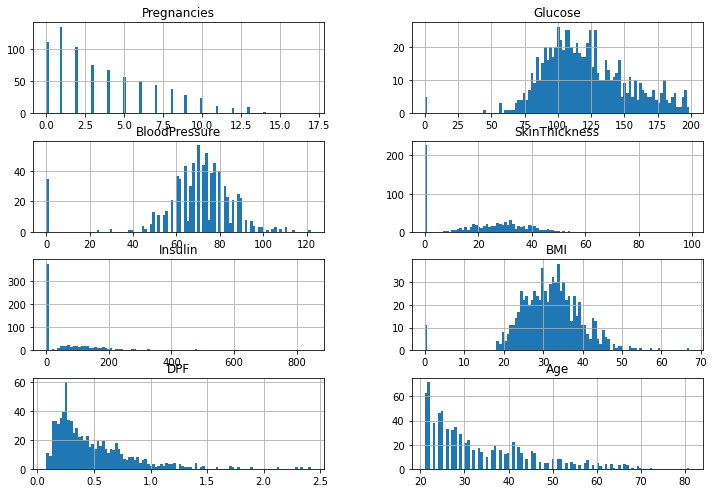

In [9]:
columns = list(pdata)[0:-1] # Excluding Outcome column which has only 
pdata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

## Identify Correlation in data 

<AxesSubplot:>

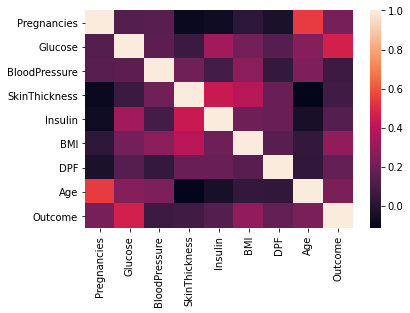

In [10]:
sns.heatmap(pdata.corr())

In [11]:
pdata.corr() # It will show correlation matrix 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DPF,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [12]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')


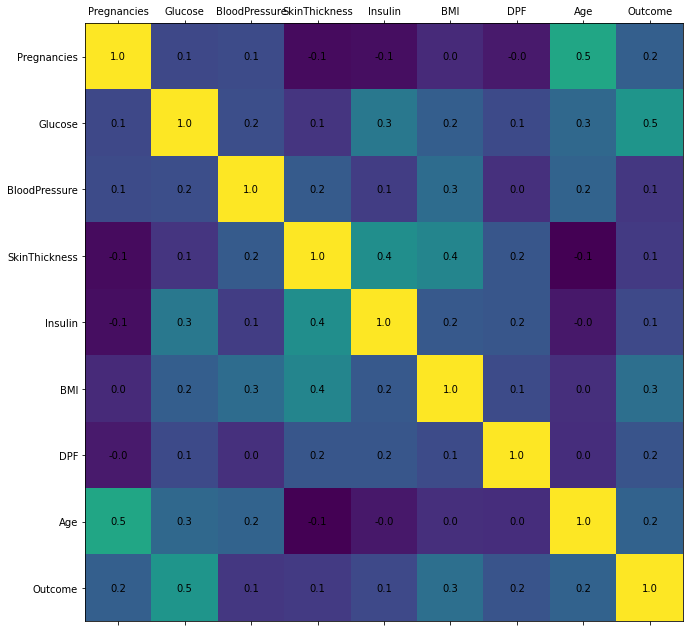

In [13]:
plot_corr(pdata)

In above plot yellow colour represents maximum correlation and blue colour represents minimum correlation.
We can see none of variable have correlation with any other variables.

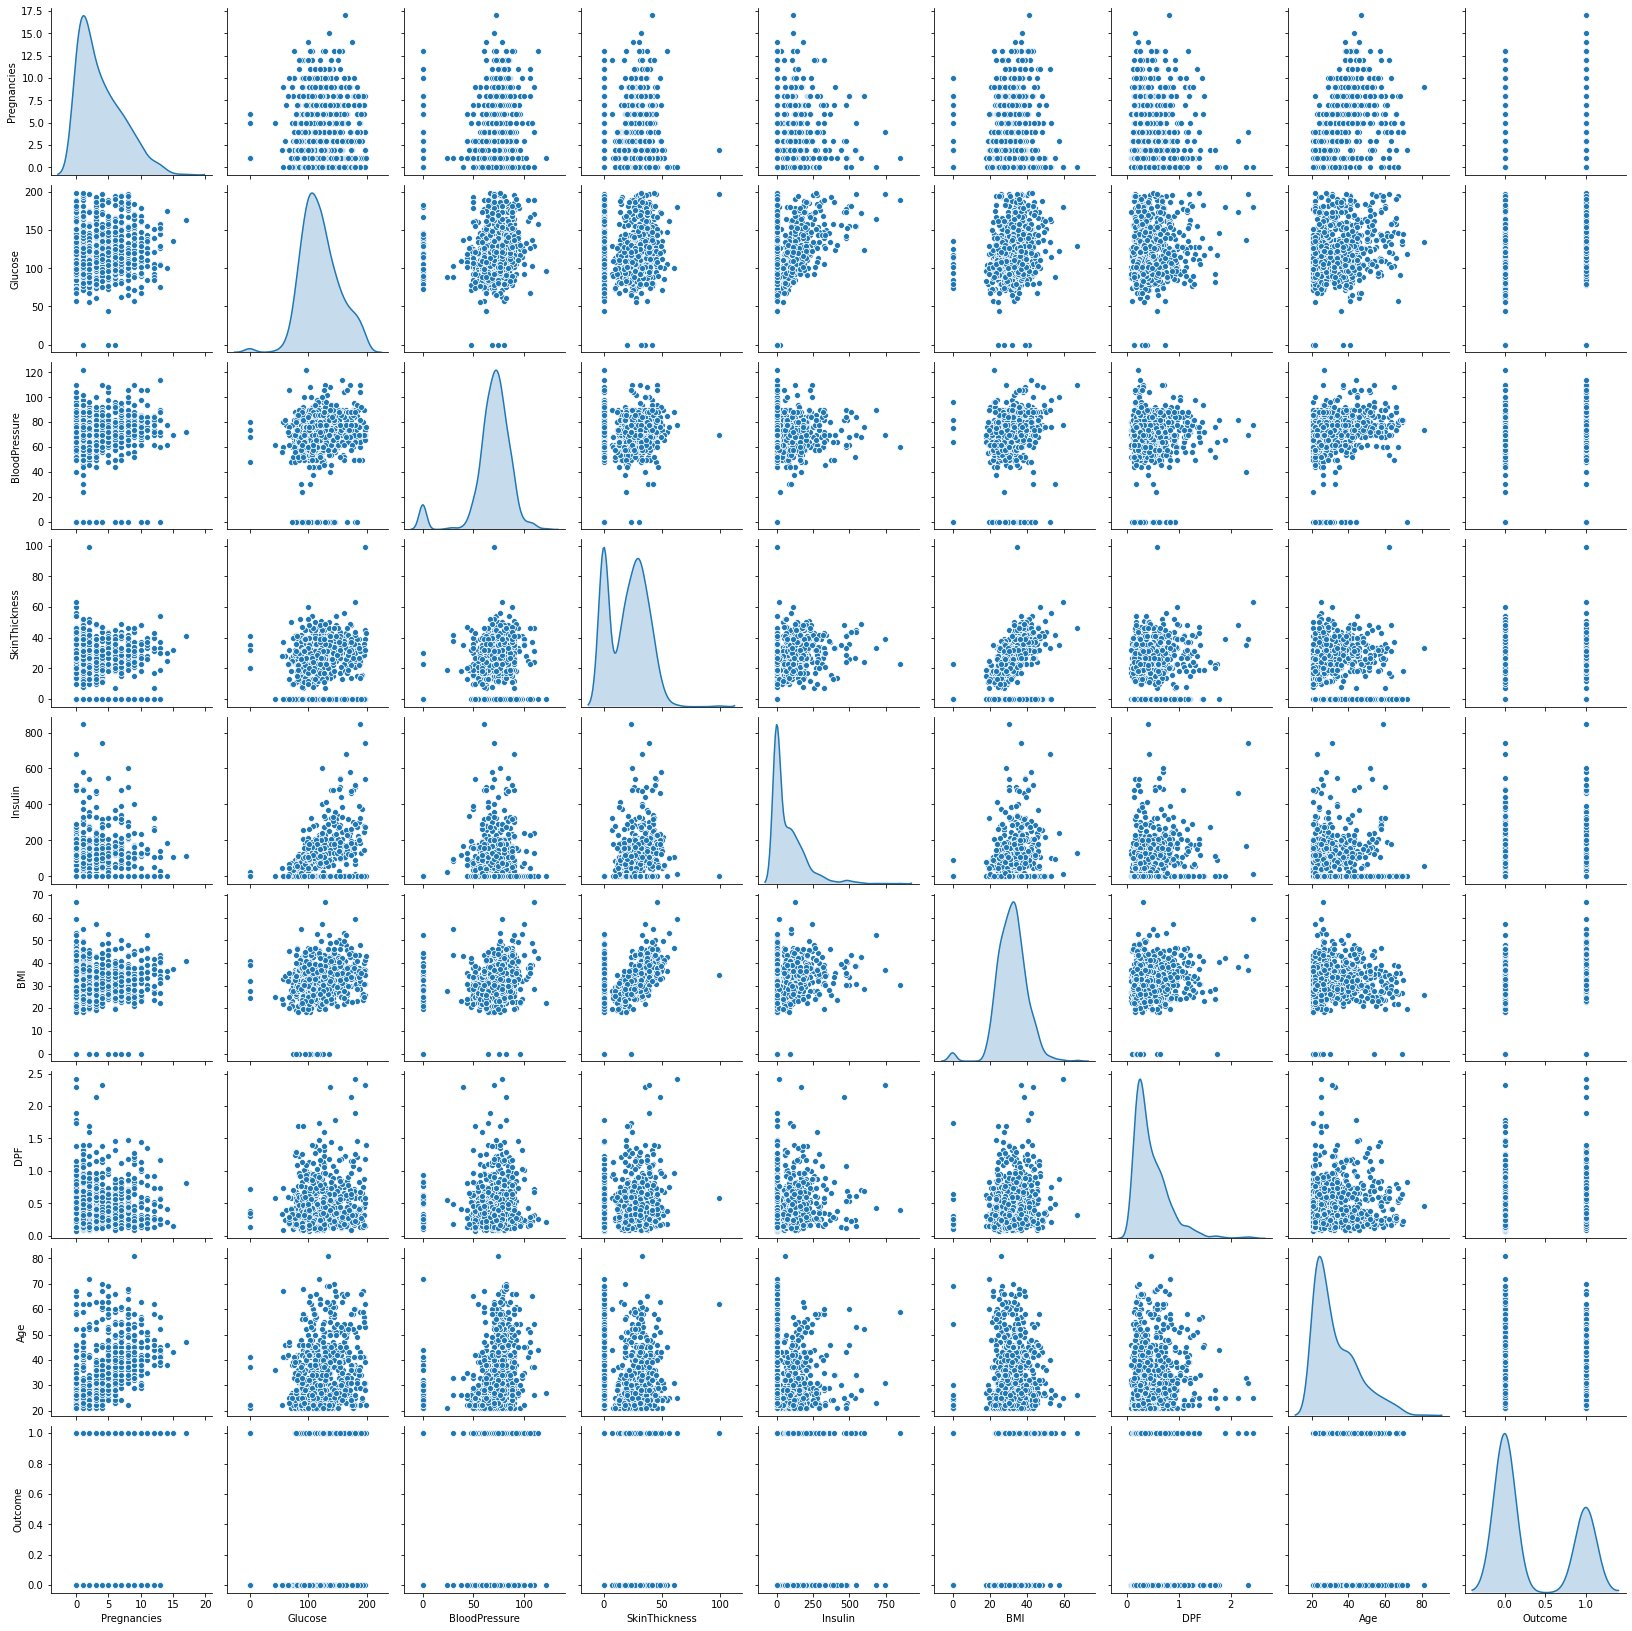

In [14]:
sns.pairplot(pdata,diag_kind='kde')

## Calculate diabetes ratio of True/False from outcome variable 

In [17]:
# Can just use value counts
n_true = len(pdata.loc[pdata['Outcome'] == True])
n_false = len(pdata.loc[pdata['Outcome'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 268 (34.90%)
Number of false cases: 500 (65.10%)


In [19]:
pdata['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [20]:
pdata['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

So we have 34.90% people in current data set who have diabetes and rest of 65.10% doesn't have diabetes. 

Its a good distribution True/False cases of diabetes in data.

# Data Preparation

### Check hidden missing values 

As we checked missing values earlier but haven't got any. But there can be lots of entries with 0 values. We must need to take care of those as well.

### Replace 0s with serial mean 

In [21]:
pdata.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [24]:
# note that the in the video of this explanation, we have imputed all the zereos. However, this might not be a good approach
# as we have other columns where we might need to keep the zeroes as they are. Ex.-pregnancy column

# Hence, we will get the imputer to run on the relevant columns only.

from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
#cols=['Preg','Pres','skin','test','mass','pedi']
cols = pdata.columns[:-1]
imputer = rep_0.fit(pdata[cols])
pdata[cols] = imputer.transform(pdata[cols])



pdata.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6.000000,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50.0,1
1,1.000000,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31.0,0
2,8.000000,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32.0,1
3,1.000000,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21.0,0
4,4.494673,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33.0,1
5,5.000000,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30.0,0
6,3.000000,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26.0,1
7,10.000000,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29.0,0
8,2.000000,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53.0,1
9,8.000000,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54.0,1


## Spliting the data 
We will use 70% of data for training and 30% for testing.

In [26]:
from sklearn.model_selection import train_test_split

X = pdata.drop('Outcome',axis=1)     # Predictor feature columns (8 X m)
Y = pdata['Outcome']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
88,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
467,4.494673,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
550,1.000000,116.0,70.0,28.0,155.548223,27.4,0.204,21.0
147,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
481,4.494673,123.0,88.0,37.0,155.548223,35.2,0.197,29.0


Lets check split of data

In [27]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

69.92% data is in training set
30.08% data is in test set


Now lets check diabetes True/False ratio in split data 

In [30]:
print("Original Diabetes True Values    : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Outcome'] == 1]), (len(pdata.loc[pdata['Outcome'] == 1])/len(pdata.index)) * 100))
print("Original Diabetes False Values   : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Outcome'] == 0]), (len(pdata.loc[pdata['Outcome'] == 0])/len(pdata.index)) * 100))
print("")
print("Training Diabetes True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Diabetes False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Diabetes True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Diabetes False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Diabetes True Values    : 268 (34.90%)
Original Diabetes False Values   : 500 (65.10%)

Training Diabetes True Values    : 183 (34.08%)
Training Diabetes False Values   : 354 (65.92%)

Test Diabetes True Values        : 85 (36.80%)
Test Diabetes False Values       : 146 (63.20%)



# Logistic Regression

In [31]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2        3         4         5         6  \
0  0.124567  0.026185 -0.029837 -0.01215 -0.000102  0.073102  0.352045   

          7  intercept  
0  0.012661  -4.899795  


In [32]:
model_score = model.score(x_test, y_test)
print(model_score)

0.7792207792207793


<AxesSubplot:>

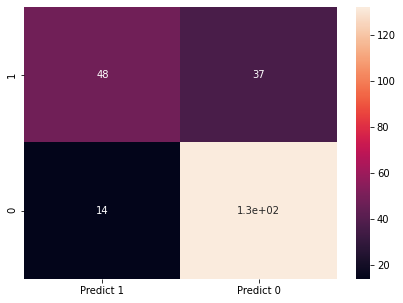

In [33]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted that they do have diabetes 48

True Negatives (TN): we correctly predicted that they don't have diabetes 132

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 14 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 37 Falsely predict negative Type II error

In [34]:
df_cm

,Predict 1,Predict 0
1,48,37
0,14,132
